## Chapter 7
# The Wave Equation

## Modeling Vibration with Finite Difference Equations

We can estimate the displacement $u$ of the point $x_j$ along a string at time $t_n$ using the _finite difference approximation of the wave equation_:

$u_{n+1,\space j} = u_{n,\space j + 1} + u_{n,\space j - 1} - u_{n - 1,\space j}$

In [1]:
import numpy as np

def populate_finite_differences_matrix(u, initial_displacements):
    u[0,:] = initial_displacements
    u[1,:] = u[0,:]
    for t in range(2, u.shape[0]):
        u[t,:] = np.roll(u[t - 1,:], 1) + np.roll(u[t - 1,:], -1) - u[t - 2,:]
    return u

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

def plot_finite_differences_matrix(u):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.gca(projection='3d')
    x, y = np.meshgrid(np.arange(u.shape[1]), np.arange(u.shape[0]))
    surf = ax.plot_surface(x, y, u, cmap='coolwarm', antialiased=True, rcount=u.shape[1], ccount=u.shape[0])
    
    ax.plot(np.arange(u.shape[1]), np.zeros(u.shape[0]), u[0,:], linewidth=4, color='black')
    ax.set_xlabel('Position $x$')
    ax.set_ylabel('Time $t$')
    ax.set_zlabel('Displacement $u$')
    ax.set_zlim(-2, 2)

In [3]:
T = 201
N = 201
u = np.ndarray((T, N))

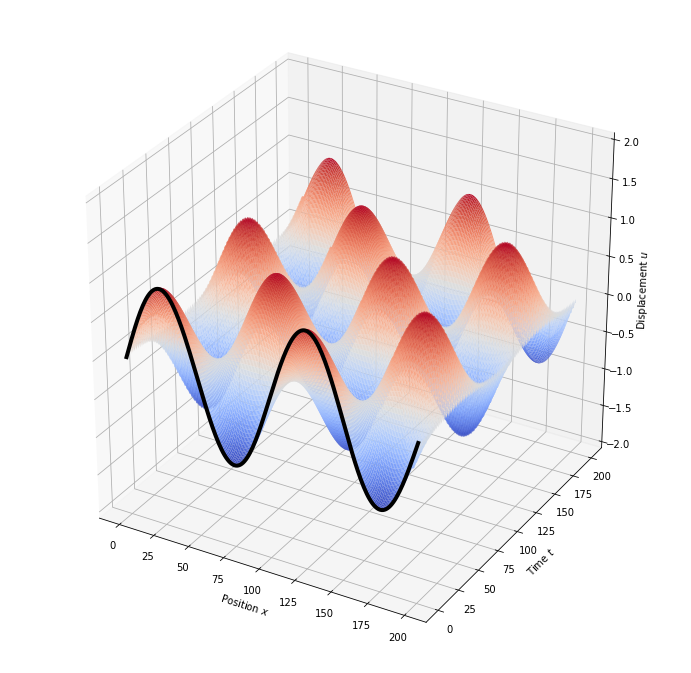

In [4]:
populate_finite_differences_matrix(u, np.sin(np.linspace(0, 4 * np.pi, u.shape[1])))
plot_finite_differences_matrix(u)

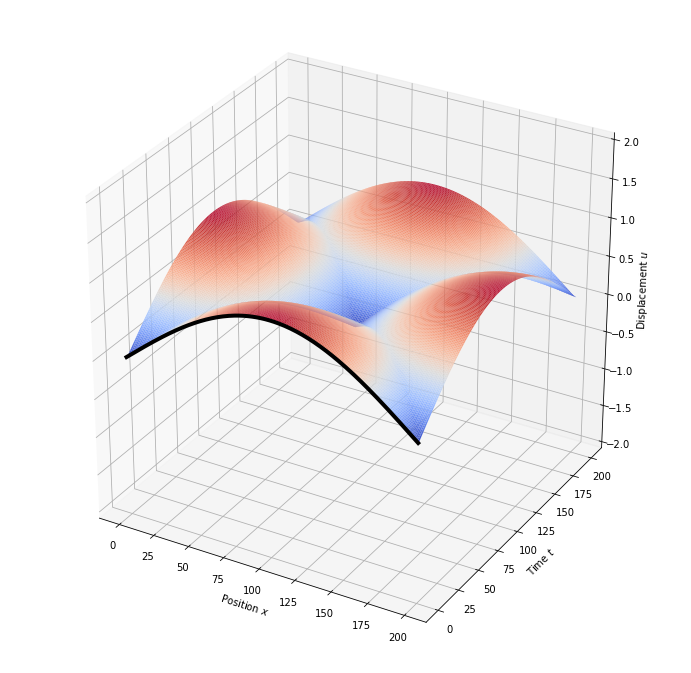

In [5]:
populate_finite_differences_matrix(u, np.sin(np.linspace(0, np.pi, u.shape[1])))
plot_finite_differences_matrix(u)

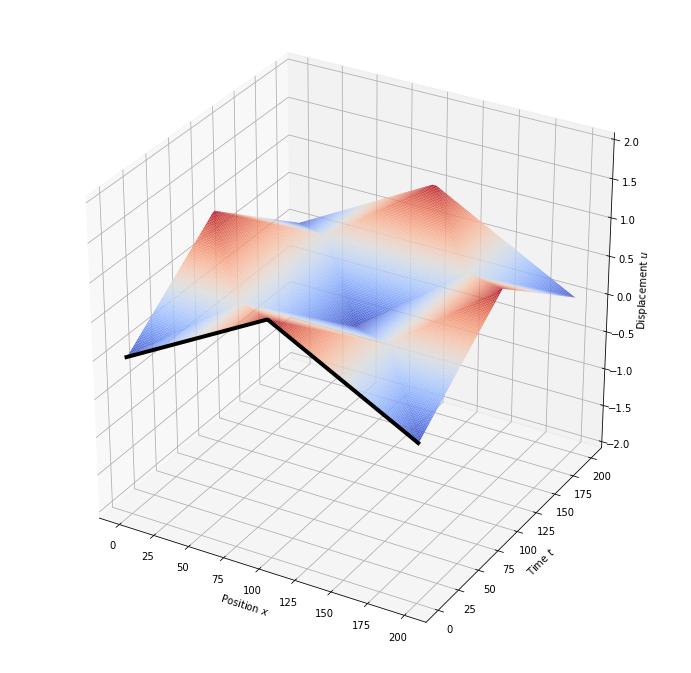

In [6]:
plot_finite_differences_matrix(populate_finite_differences_matrix(u, np.hstack([np.linspace(0, 1, N // 2), np.linspace(1, 0, N // 2 + 1)])))

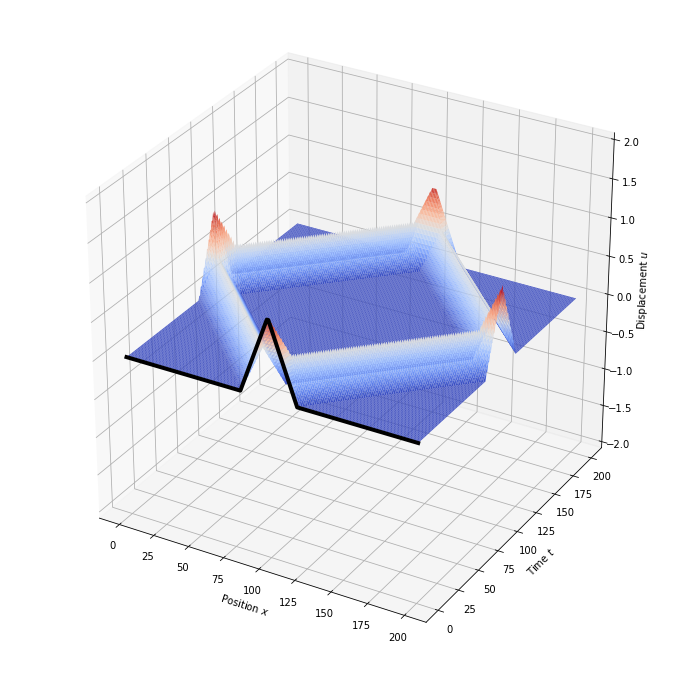

In [7]:
plot_finite_differences_matrix(populate_finite_differences_matrix(u, np.hstack([np.zeros((N - 40) // 2), np.linspace(0, 1, 20), np.linspace(1, 0, 20), np.zeros((N - 40) // 2 + 1)])))

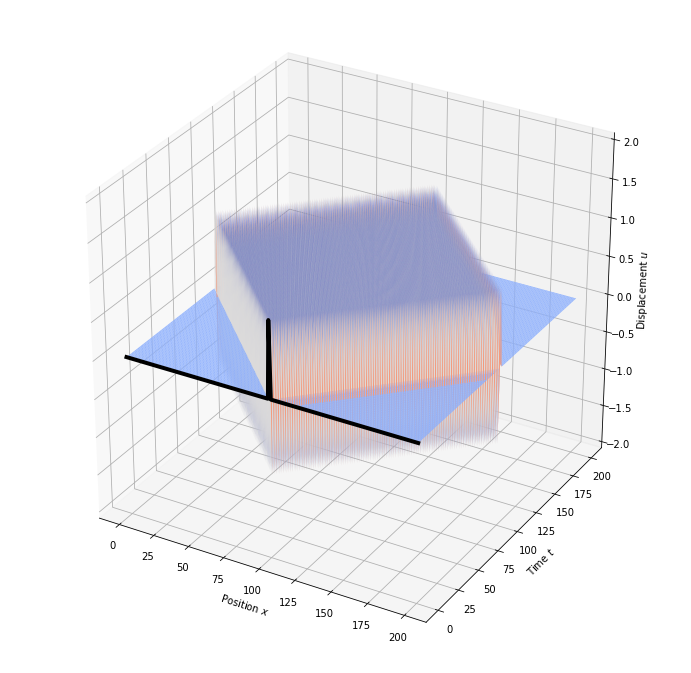

In [8]:
plot_finite_differences_matrix(populate_finite_differences_matrix(u, np.hstack([np.zeros(N // 2), [1], np.zeros(N // 2)])))